> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.


- Introduction: No-show dataset was collected from 100,000 medical appointments in Brazil, mainly focused on the question of whether the patients show up for their appointment or not

- Questions:
1. is the age and SMS_resevied affect show or no-show?
(Is age  and sms influence on the patient's show or no-show for appointments)
2. what is the overall of (show Vs. no-show)
(In general, what is the difference between show and no-show for appointment)

In [1]:
#import the needed  packages for my analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

1) First cell below > Load the data & Display the first few rows.
2) Second cell below > Number of Rows & Columns

### 1) Load the data & Display the first few rows.

In [2]:
#Load data from csv files into a Pandas dataframe
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
#   types and look for instances of missing or possibly errant data.
#Display the first few rows, to know how the data looks like
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### 2) Know the No. of rows & columns

In [3]:
# Know the No. of rows & columns
df.shape

(110527, 14)

### 3) Check which columns have missing values & Data type

In [4]:
# Check which columns have missing values & Data type
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### 4)Check if there is duplicated data

In [5]:
# Check if there is duplicated data
print(sum(df.duplicated()))

0


### 5)Check if there is duplicated data

In [6]:
# Check if there is duplicated data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).


1. Rename the columns to remove typo and lowercase letters to make them easer to deal with
2. change the type of PatientId to Integer & ScheduledDay and AppointmentDay to datetime
3. limit the age between 0-100, to make it more reasonable
4. Count how many times people show or no-show
5. Create new column named DayOfWeek to know the name of the day

### Data Cleaning (Rename&Change Types)

### 1)Rename the columns and rename typos from hypertension and handicap

In [7]:
df.rename(columns={'PatientId':'patient_id','AppointmentID':'appointment_id','Gender':'gender','ScheduledDay':'scheduled_day','AppointmentDay':'appointment_day','Age':'age','Neighbourhood':'neighbourhood','Scholarship':'scholarship','Hipertension':'hypertension','Diabetes':'diabetes','Alcoholism':'alcoholism', 'Handcap':'handicap', 'SMS_received':'sms_received', 'No-show':'no_show'}, inplace=True)

### 2)Dislay the changes in the columns names

In [8]:
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### 3) Convert the patient_id type from float to int 

In [9]:
df['patient_id'] = df['patient_id'].astype(int)

### 4) Convert scheduled_day to datetime type

In [10]:
df.scheduled_day = df.scheduled_day.apply(np.datetime64)

### 5)Convert appointment_day to datetime type and check the info again to make sure the data types are changed

In [11]:
df.appointment_day = df.appointment_day.apply(np.datetime64)

### 6)Show the changes in data types

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_id         110527 non-null int64
appointment_id     110527 non-null int64
gender             110527 non-null object
scheduled_day      110527 non-null datetime64[ns]
appointment_day    110527 non-null datetime64[ns]
age                110527 non-null int64
neighbourhood      110527 non-null object
scholarship        110527 non-null int64
hypertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handicap           110527 non-null int64
sms_received       110527 non-null int64
no_show            110527 non-null object
dtypes: datetime64[ns](2), int64(9), object(3)
memory usage: 11.8+ MB


### 8)Make the age in the range between 0 to 100

In [13]:
df = df[df['age'].between(0, 100, inclusive=True)]

### 9)How many times No show happen

In [14]:
no_showNo = df.query('no_show == "No"')

### 10) How many time shwen hapen

In [15]:
no_showen = df.query('no_show == "Yes"')

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (is the age and SMS_resevied affect show or no-show?)

### FIRST: Is the age affect the appointment no-show

In [16]:
age_of_noShow = no_showNo['age']

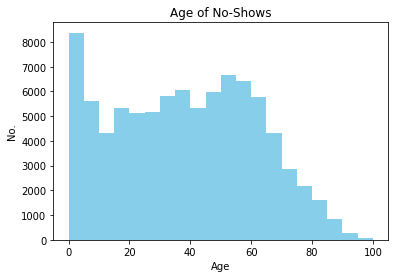

In [17]:
plt.hist(age_of_noShow, stacked=True, bins=20, color='skyblue')
plt.title('Age of No-Shows')
plt.xlabel('Age')
plt.ylabel('No.');

### SECOND: Is the age affect the appointment show

In [18]:
age_of_showen = no_showen['age']

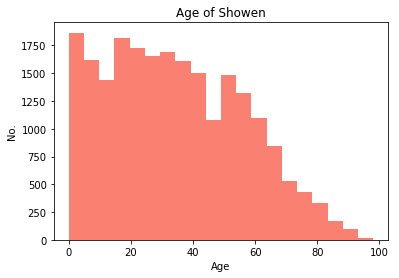

In [19]:
plt.hist(age_of_showen, stacked=True, bins=20, color='salmon')
plt.title('Age of Showen')
plt.xlabel('Age')
plt.ylabel('No.');

### THIRD:Is the SMS_resevied affect show or no-show ?

Text(0.5,0,'Showen to ppointments')

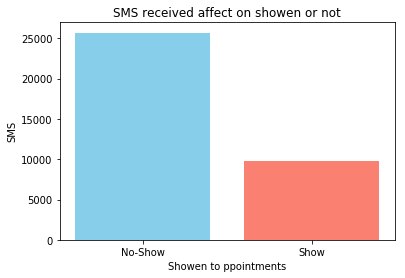

In [20]:
Nosms_c = no_showNo.query('sms_received == 1')
x = Nosms_c .shape[0]
Showensms_c = no_showen.query('sms_received == 1')
y = Showensms_c.shape[0]
locations = [1, 2]
labels = ['No-Show', 'Show']
heights = [x, y]
bar1 = plt.bar(locations, heights, tick_label=labels, color=['skyblue','salmon'])
plt.title('SMS received affect on showen or not')
plt.ylabel('SMS')
plt.xlabel('Showen to ppointments')

### Research Question 2  (what is the overall of (show Vs. no-show) ?)

In [21]:
#Count the number of shwo Vs. No-Show
showComp = df['no_show'].value_counts()
showComp

No     88203
Yes    22316
Name: no_show, dtype: int64

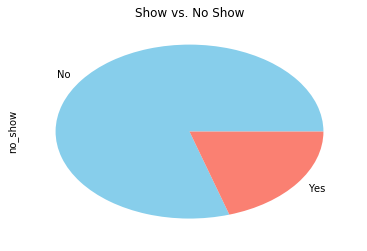

In [22]:
#Show the result in pie chart
showComp.plot(kind='pie', title='Show vs. No Show', colors=['skyblue','salmon'])

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.
### 1. Limitations:
#### 1. The dataset dates is not enough to decide if the show or no-show depends on the date because it's specify only few months
#### 2. Some columns not described in a proper way.
#### 3. the majority of the data given is no-show data
#### 4. the age limit is not reasonable because there is no such age -1

### 2. Findings:
### Q1. 
#### 1) FIRST: People tend to no-show (over 80,000) 
#### 2) SECOND: People how tend to show more are less than no-show.
#### 3) SMS messages have no influnce on the show or no-show beacuse people who received sms tend to no-show more.
### Q2. 
#### - In general and regardless of any attribute of the patients as showen in this data set most people tend to no-show to their appoitmnes.

### 3. Conclusion:
#### -  This analysis shows the total number of patients show and no-show to appointments and age groups that tend to not show mostly and how the sms sent to them affect the show to appoinyments.
#### - If the hospitals use some analysis like this the will know what kind of patients tend to show up to appointments or do not show, and whats the factors that may affect them so the hospital can make a proper decision and make correct appointments.


## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [23]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0